In [ ]:
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with 'title', 'viewcount', 'likecount'
df['title'] = df['title'].astype(str)

# Initialize the Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each title and create a new column
df['sentiment'] = df['title'].apply(lambda title: sid.polarity_scores(title)['compound'])

df['sentiment_category'] = df['sentiment'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')

# Count the number of titles in each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

print(sentiment_counts['positive'])
print(sentiment_counts['negative'])
print(sentiment_counts['neutral'])

# Scatter plot: Sentiment vs. View count
plt.scatter(df['sentiment'], df['viewCount'], alpha=0.5)
plt.title('Sentiment vs. View Count')
plt.xlabel('Sentiment')
plt.ylabel('View Count')
plt.show()

# Scatter plot: Sentiment vs. Like count
plt.scatter(df['sentiment'], df['likeCount'], alpha=0.5)
plt.title('Sentiment vs. Like Count')
plt.xlabel('Sentiment')
plt.ylabel('Like Count')
plt.show()

In [ ]:
# Assuming you already have 'sentiment_category' column in your DataFrame
sentiment_percentage = df['sentiment_category'].value_counts(normalize=True) * 100

# Display the percentage values for each sentiment category
print(f"Positive Sentiment Percentage: {sentiment_percentage.get('positive', 0):.2f}%")
print(f"Negative Sentiment Percentage: {sentiment_percentage.get('negative', 0):.2f}%")
print(f"Neutral Sentiment Percentage: {sentiment_percentage.get('neutral', 0):.2f}%")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

def analyze_sentiment(df, file_name):
    df['title'] = df['title'].astype(str)
    sid = SentimentIntensityAnalyzer()

    df['sentiment'] = df['title'].apply(lambda title: sid.polarity_scores(title)['compound'])
    df['sentiment_category'] = df['sentiment'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')

    sentiment_counts = df['sentiment_category'].value_counts()

    sentiment_percentage = df['sentiment_category'].value_counts(normalize=True) * 100
    sentiment_percentage['File'] = file_name  # Add a 'File' column to store the file name

    print(f"Positive Sentiment Percentage: {sentiment_percentage.get('positive', 0):.2f}%")
    print(f"Negative Sentiment Percentage: {sentiment_percentage.get('negative', 0):.2f}%")
    print(f"Neutral Sentiment Percentage: {sentiment_percentage.get('neutral', 0):.2f}%")

    return sentiment_percentage

# Example: Apply the analysis function to multiple files
files = ['autos/top_autos_vid.csv', 'travel/top_travel_vid.csv', 'shows/top_shows_vid.csv', 'sports/top_sports_vid.csv', 'tech/top_tech_vid.csv']  # Replace with your actual file names

# Create a list to store results from each file
results = []

for file in files:
    df = pd.read_csv(file)  # Assuming your data is in CSV files
    result = analyze_sentiment(df, file)
    results.append(result)

# Create a summary DataFrame of percentage values for each sentiment category, with file names as category IDs
summary_df = pd.concat(results).fillna(0)

# Display the summary DataFrame
print("\nSummary Table:")
print(summary_df)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

def analyze_sentiment(df, file_name):
    df['title'] = df['title'].astype(str)
    sid = SentimentIntensityAnalyzer()

    df['sentiment'] = df['title'].apply(lambda title: sid.polarity_scores(title)['compound'])
    df['sentiment_category'] = df['sentiment'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')

    sentiment_counts = df['sentiment_category'].value_counts()

    sentiment_percentage = df['sentiment_category'].value_counts(normalize=True) * 100
    sentiment_percentage['File'] = file_name  # Add a 'File' column to store the file name

    print(f"Positive Sentiment Percentage: {sentiment_percentage.get('positive', 0):.2f}%")
    print(f"Negative Sentiment Percentage: {sentiment_percentage.get('negative', 0):.2f}%")
    print(f"Neutral Sentiment Percentage: {sentiment_percentage.get('neutral', 0):.2f}%")

    return sentiment_percentage

# Example: Apply the analysis function to multiple files
files = ['autos/bottom_autos_vid.csv', 'travel/bottom_travel_vid.csv', 'shows/bottom_shows_vid.csv', 'sports/top_sports_vid.csv', 'tech/bottom_tech_vid.csv']  # Replace with your actual file names

# Create a list to store results from each file
results = []

for file in files:
    df = pd.read_csv(file)  # Assuming your data is in CSV files
    result = analyze_sentiment(df, file)
    results.append(result)

# Create a summary DataFrame of percentage values for each sentiment category, with file names as category IDs
summary_df = pd.concat(results).fillna(0)

# Display the summary DataFrame
print("\nSummary Table:")
print(summary_df)

In [1]:
import re

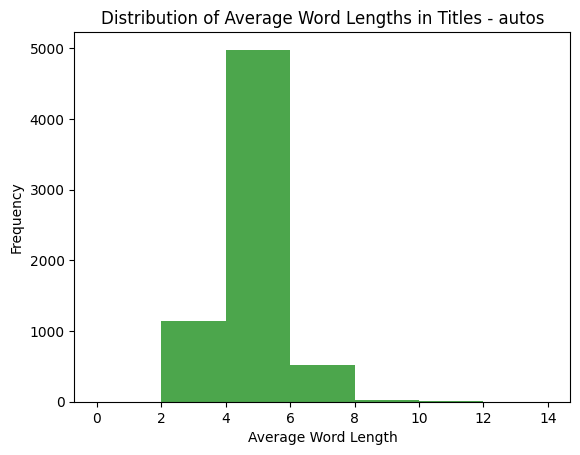

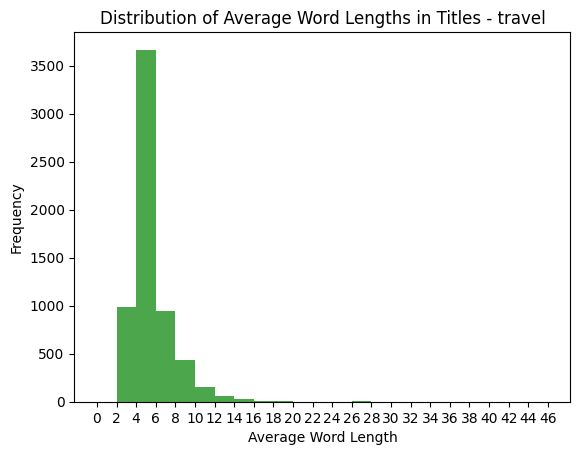

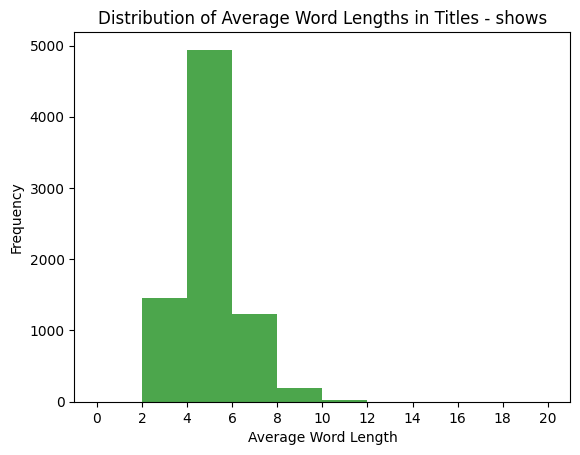

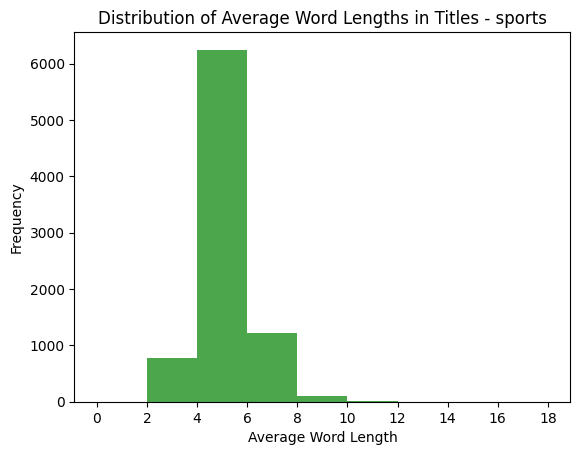

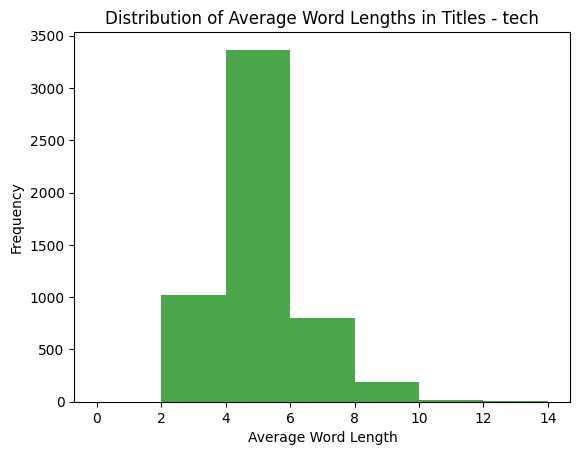

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import re

def process_and_plot_word_length(file):
    # Read the CSV file
    match = re.match(r'([^/]+)/', file)
    if match:
        category = match.group(1)
    else:
        category = 'Unknown'
    df = pd.read_csv(file)

    # Calculate average word length for each title
    df['avg_word_length'] = df['title'].apply(lambda title: sum(len(word) for word in title.split()) / len(title.split()))

    # Get the maximum average word length across all files
    max_word_length = df['avg_word_length'].max()

    # Set the bins based on the maximum word length
    bins = [i for i in range(0, int(max_word_length) + 3, 2)]

    # Visualize the distribution of average word lengths
    plt.hist(df['avg_word_length'], bins=bins, color='green', alpha=0.7)
    plt.title(f'Distribution of Average Word Lengths in Titles - {category}')
    plt.xlabel('Average Word Length')
    plt.ylabel('Frequency')

    # Set x-axis ticks with an interval of 5
    plt.xticks(range(0, int(max_word_length) + 3, 2))

    plt.show()

# Example: Apply the function to multiple files
files = ['autos/top_autos_vid.csv', 'travel/top_travel_vid.csv', 'shows/top_shows_vid.csv', 'sports/top_sports_vid.csv', 'tech/top_tech_vid.csv']

for file in files:
    process_and_plot_word_length(file)

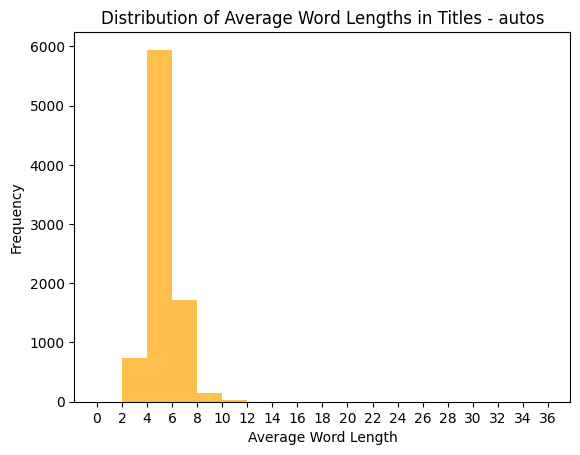

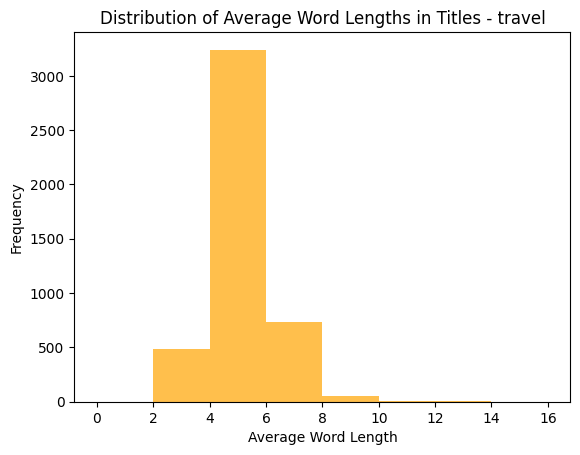

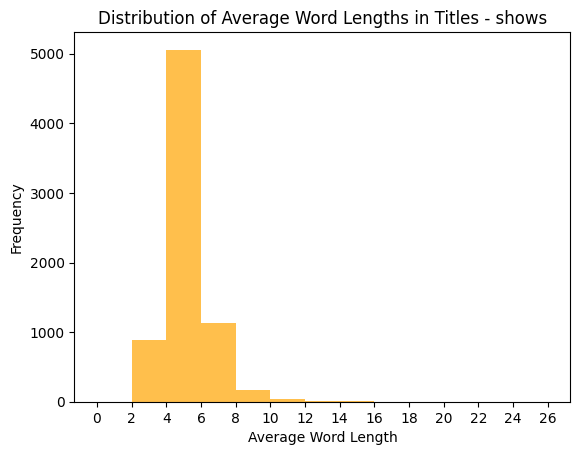

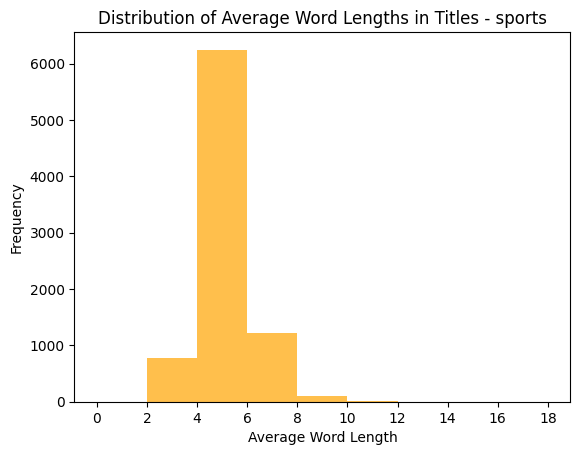

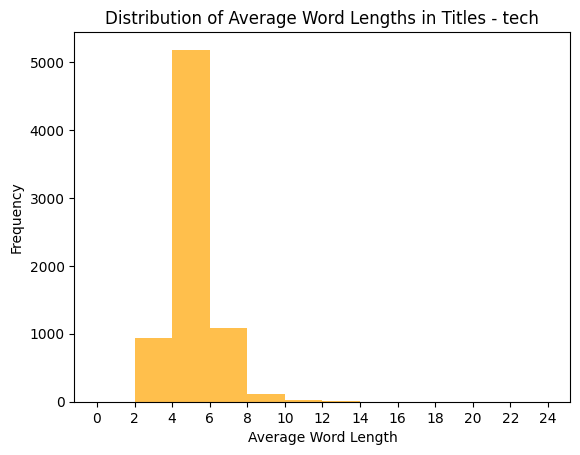

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

def process_and_plot_word_length(file):
    # Read the CSV file
    match = re.match(r'([^/]+)/', file)
    if match:
        category = match.group(1)
    else:
        category = 'Unknown'
    df = pd.read_csv(file)

    # Calculate average word length for each title
    df['avg_word_length'] = df['title'].apply(lambda title: sum(len(word) for word in title.split()) / len(title.split()))

    # Get the maximum average word length across all files
    max_word_length = df['avg_word_length'].max()

    # Set the bins based on the maximum word length
    bins = [i for i in range(0, int(max_word_length) + 3, 2)]

    # Visualize the distribution of average word lengths
    plt.hist(df['avg_word_length'], bins=bins, color='orange', alpha=0.7)
    plt.title(f'Distribution of Average Word Lengths in Titles - {category}')
    plt.xlabel('Average Word Length')
    plt.ylabel('Frequency')

    # Set x-axis ticks with an interval of 5
    plt.xticks(range(0, int(max_word_length) + 3, 2))

    plt.show()

# Example: Apply the function to multiple files
files = ['autos/bottom_autos_vid.csv', 'travel/bottom_travel_vid.csv', 'shows/bottom_shows_vid.csv','sports/top_sports_vid.csv', 'tech/bottom_tech_vid.csv']

for file in files:
    process_and_plot_word_length(file)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def process_and_plot(file):

    match = re.match(r'([^/]+)/', file)
    if match:
        category = match.group(1)
    else:
        category = 'Unknown'

    # Read the CSV file
    df = pd.read_csv(file)

    # Calculate title length in characters
    df['title_length_characters'] = df['title'].apply(len)

    # Define intervals and width for the histogram
    interval_bins = range(0, max(df['title_length_characters']) + 10, 10)
    bar_width = 8  # Adjust the width as needed

    # Histogram: Title length distribution with intervals and space between bars
    plt.hist(df['title_length_characters'], bins=interval_bins, color='green', alpha=0.7, width=bar_width)
    #plt.title(f'Distribution of Title Lengths - {file}')
    plt.title(f'Distribution of Title Lengths - {category}')
    plt.xlabel('Title Length (Characters)')
    plt.ylabel('Frequency')
    plt.show()

# Example: Apply the function to multiple files
files = ['autos/top_autos_vid.csv', 'travel/top_travel_vid.csv', 'shows/top_shows_vid.csv', 'sports/top_sports_vid.csv', 'tech/top_tech_vid.csv']
for file in files:
    process_and_plot(file)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def process_and_plot(file):

    match = re.match(r'([^/]+)/', file)
    if match:
        category = match.group(1)
    else:
        category = 'Unknown'

    # Read the CSV file
    df = pd.read_csv(file)

    # Calculate title length in characters
    df['title_length_characters'] = df['title'].apply(len)

    # Define intervals and width for the histogram
    interval_bins = range(0, max(df['title_length_characters']) + 10, 10)
    bar_width = 8  # Adjust the width as needed

    # Histogram: Title length distribution with intervals and space between bars
    plt.hist(df['title_length_characters'], bins=interval_bins, color='orange', alpha=0.7, width=bar_width)
    #plt.title(f'Distribution of Title Lengths - {file}')
    plt.title(f'Distribution of Title Lengths - {category}')
    plt.xlabel('Title Length (Characters)')
    plt.ylabel('Frequency')
    plt.show()

# Example: Apply the function to multiple files
files = ['autos/bottom_autos_vid.csv', 'travel/bottom_travel_vid.csv', 'shows/bottom_shows_vid.csv','sports/top_sports_vid.csv', 'tech/bottom_tech_vid.csv']
for file in files:
    process_and_plot(file)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_combined_wordcloud(files):
    # Read all CSV files and combine titles into a single string
    all_titles = ''
    for file in files:
        df = pd.read_csv(file)
        all_titles += ' '.join(df['title'].astype(str)) + ' '

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Combined Word Cloud for Titles')
    plt.show()

# Example: Generate a combined word cloud for multiple files
files = ['autos/top_autos_vid.csv', 'travel/top_travel_vid.csv', 'shows/top_shows_vid.csv', 'sports/top_sports_vid.csv', 'tech/top_tech_vid.csv']
generate_combined_wordcloud(files)


In [ ]:
import pandas as pd
import textstat
import matplotlib.pyplot as plt

def process_and_plot_readability(file):
    # Read the CSV file
    df = pd.read_csv(file)

    # Assuming you have a 'title' column in the DataFrame
    df['title'] = df['title'].astype(str)

    # Calculate Flesch-Kincaid readability score for each title
    df['readability_score'] = df['title'].apply(lambda title: textstat.flesch_kincaid_grade(title))

    # Visualize the distribution of readability scores
    plt.hist(df['readability_score'], bins=10, color='skyblue', alpha=0.7)
    plt.title(f'Distribution of Title Readability Scores - {file}')
    plt.xlabel('Flesch-Kincaid Readability Score')
    plt.ylabel('Frequency')
    plt.show()

# Example: Apply the function to multiple files
files = ['autos/top_autos_vid.csv', 'travel/top_travel_vid.csv', 'shows/top_shows_vid.csv', 'sports/top_sports_vid.csv', 'tech/top_tech_vid.csv']

for file in files:
    process_and_plot_readability(file)


In [ ]:
import pandas as pd
import textstat
import matplotlib.pyplot as plt

def process_and_plot_readability(file):
    # Read the CSV file
    df = pd.read_csv(file)

    # Assuming you have a 'title' column in the DataFrame
    df['title'] = df['title'].astype(str)

    # Calculate Flesch-Kincaid readability score for each title
    df['readability_score'] = df['title'].apply(lambda title: textstat.flesch_kincaid_grade(title))

    # Visualize the distribution of readability scores
    plt.hist(df['readability_score'], bins=10, color='skyblue', alpha=0.7)
    plt.title(f'Distribution of Title Readability Scores - {file}')
    plt.xlabel('Flesch-Kincaid Readability Score')
    plt.ylabel('Frequency')
    plt.show()

# Example: Apply the function to multiple files
files = ['autos/bottom_autos_vid.csv', 'travel/bottom_travel_vid.csv', 'shows/bottom_shows_vid.csv', 'sports/bottom_sports_vid.csv', 'tech/bottom_tech_vid.csv']

for file in files:
    process_and_plot_readability(file)


In [ ]:
from nltk import FreqDist, bigrams
from nltk.corpus import stopwords
import pandas as pd
import nltk
import glob
import re
from nltk.tokenize import word_tokenize

# Download the stopwords dataset if you haven't already
nltk.download('stopwords')
nltk.download('punkt')

# Get the list of English stopwords
english_stopwords = set(stopwords.words('english'))

# Function to tokenize and extract bigrams from a given file
def process_file(file_path, column_name):
    # Read the file into a DataFrame (modify this based on your file format)
    df = pd.read_csv(file_path)

    # Assuming the specified column_name is present in the DataFrame
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame. Please specify the correct column name.")

    # Clean and tokenize titles
    df['cleaned_titles'] = df[column_name].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)))
    df['tokenized_titles'] = df['cleaned_titles'].apply(lambda x: [word for word in word_tokenize(x.lower()) if len(word) > 2 and word not in english_stopwords])

    all_bigrams = [
        bigram
        for tokens in df['tokenized_titles']
        for bigram in bigrams(tokens)
        if all(word.lower() not in english_stopwords for word in bigram)
    ]

    return all_bigrams

# List of files
files = ['autos/top_autos_vid.csv', 'travel/top_travel_vid.csv', 'shows/top_shows_vid.csv', 'sports/top_sports_vid.csv', 'tech/top_tech_vid.csv']

# Specify the actual column name containing the tokenized titles
tokenized_column_name = 'title'

# Process each file and collect bigrams
all_bigrams = []
for file_path in files:
    file_bigrams = process_file(file_path, tokenized_column_name)
    all_bigrams.extend(file_bigrams)

# Calculate bigram frequencies
bigram_freq = FreqDist(all_bigrams)

# Print or visualize the results
print(bigram_freq.most_common(10))


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming bigram_freq is a FreqDist object containing bigram frequencies

# Get the top 10 most common bigrams
top_bigrams = bigram_freq.most_common(50)

# Join bigrams into a single string
bigram_text = ' '.join([' '.join(bigram) for bigram, _ in top_bigrams])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(bigram_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 0 Bigrams - Word Cloud')
plt.show()


In [ ]:
pip install circlify matplotlib

In [ ]:
import pandas as pd
import circlify
import matplotlib.pyplot as plt

# Assuming bigram_freq is a FreqDist object containing bigram frequencies

# Get the top 50 most common bigrams
top_bigrams = bigram_freq.most_common(20)

# Create a DataFrame for the circular packing
circle_data = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])
circle_data['Word1'], circle_data['Word2'] = zip(*circle_data['Bigram'])

# Normalize frequencies for better visualization
circle_data['Frequency_normalized'] = circle_data['Frequency'] / circle_data['Frequency'].max()

# Create circular packing layout
circles = circlify.circlify(
    circle_data['Frequency_normalized'].tolist(),
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

# Plot the circular packing with labels
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)

for circle, (index, row) in zip(circles, circle_data.iterrows()):
    x, y, r = circle.circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.7, label=row['Bigram']))

    # Add text label for the word pair
    plt.text(x, y, f"{row['Word1']} - {row['Word2']}", ha='center', va='center', fontsize=12, color='black')

plt.title('Word Associations based on occurrence')
#plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# List of files
files = ['autos/top_autos_vid.csv', 'travel/top_travel_vid.csv', 'shows/top_shows_vid.csv', 'sports/top_sports_vid.csv', 'tech/top_tech_vid.csv']

# Initialize an empty DataFrame
df_all = pd.DataFrame()

# Read each file and concatenate the data
for file in files:
    df = pd.read_csv(file)
    df_all = pd.concat([df_all, df])


column_name = 'title'

# Extract word co-occurrences from the combined tokenized titles
word_co_occurrences = []

for tokens in df_all[column_name]:
    for i in range(len(tokens) - 1):
        word_co_occurrences.append((tokens[i], tokens[i + 1]))

# Create a weighted graph
G = nx.Graph()

# Add edges to the graph with weights corresponding to co-occurrence frequencies
for co_occurrence in word_co_occurrences:
    G.add_edge(co_occurrence[0], co_occurrence[1], weight=1)

# Set up positions for nodes using a spring layout
pos = nx.spring_layout(G)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, font_size=10, node_size=700, font_color='black', font_weight='bold', node_color='skyblue', edge_color='gray')

# Add edge labels showing co-occurrence frequencies
edge_labels = {(word1, word2): freq for (word1, word2, freq) in G.edges(data='weight')}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)

plt.title('Word Associations - Co-occurrence Network Graph')
plt.show()
